In [181]:
import sys 
import numpy as np                                              # numerical computation
import pandas as pd                                             # data wrangling
import matplotlib as mpl                                        # plotting functionality
import matplotlib.pyplot as plt                                 # plotting package
# rendering plots
%matplotlib inline
mpl.rcParams['figure.dpi']  = 400                               # high res figures
import sklearn          

print(f'The Python version is {sys.version}\n')
print(f'The Numpy version is {np.__version__}\n')
print(f'The Pandas version is {pd.__version__}\n')
print(f'The Matplotlib version is {mpl.__version__}\n')
print(f'The Scikit-learn version is {sklearn.__version__}\n')

The Python version is 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]

The Numpy version is 1.24.4

The Pandas version is 2.0.3

The Matplotlib version is 3.7.1

The Scikit-learn version is 1.2.2



In [182]:
df = pd.read_csv('intermediate_data/Chapter_1_cleaned_data.csv')

In [183]:
# find the proportion of the positive class
df['default payment next month'].mean()      # our response variable default payment next month binary ie 0,1

0.2217971797179718

In [184]:
# find the number of samples in each class
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

#### Learning a classification model

In [185]:
from sklearn.linear_model import LogisticRegression

my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [186]:
# instantiating logistic regression model by explicitly stating default options
my_new_lr = LogisticRegression(penalty='l2', dual=False,\
                               tol=0.0001, C=1.0,\
                               fit_intercept=True,\
                               intercept_scaling=1,\
                               class_weight=None,\
                               random_state=None,\
                               solver='lbfgs',\
                               max_iter=100,\
                               multi_class='auto',\
                               verbose=0, warm_start=False,\
                               n_jobs=None, l1_ratio=None)
my_new_lr

LogisticRegression()

In [187]:
# Changing some of the default parameters
my_new_lr.C = 0.1 
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [188]:
X = df['EDUCATION'][0:10].values.reshape(-1,1) # column vector of education feature of first 10 samples
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [189]:
y = df['default payment next month'][0:10].values # row vector of response variable of first 10 samples
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [190]:
print(X.shape, y.shape)

(10, 1) (10,)


In [191]:
# fitting logistic regression to only one feature
my_new_lr.fit(X,y)                                  # training happens in-place

LogisticRegression(C=0.1, solver='liblinear')

In [192]:
# using a trained model
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [193]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [194]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

#### Generating synthetic data

In [195]:
from numpy.random import default_rng 

rg = default_rng(12345)
X = rg.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

The assumptions of linear regression: the data exhibits a linear trend agains the feature, but has normally distributed errors.

$y=ax+b+N(\mu,\sigma)$

In [196]:
slope = 0.25
intercept = -1.25
y = slope * X + intercept + rg.normal(loc=0.0, scale=1.0, size=(1000,))

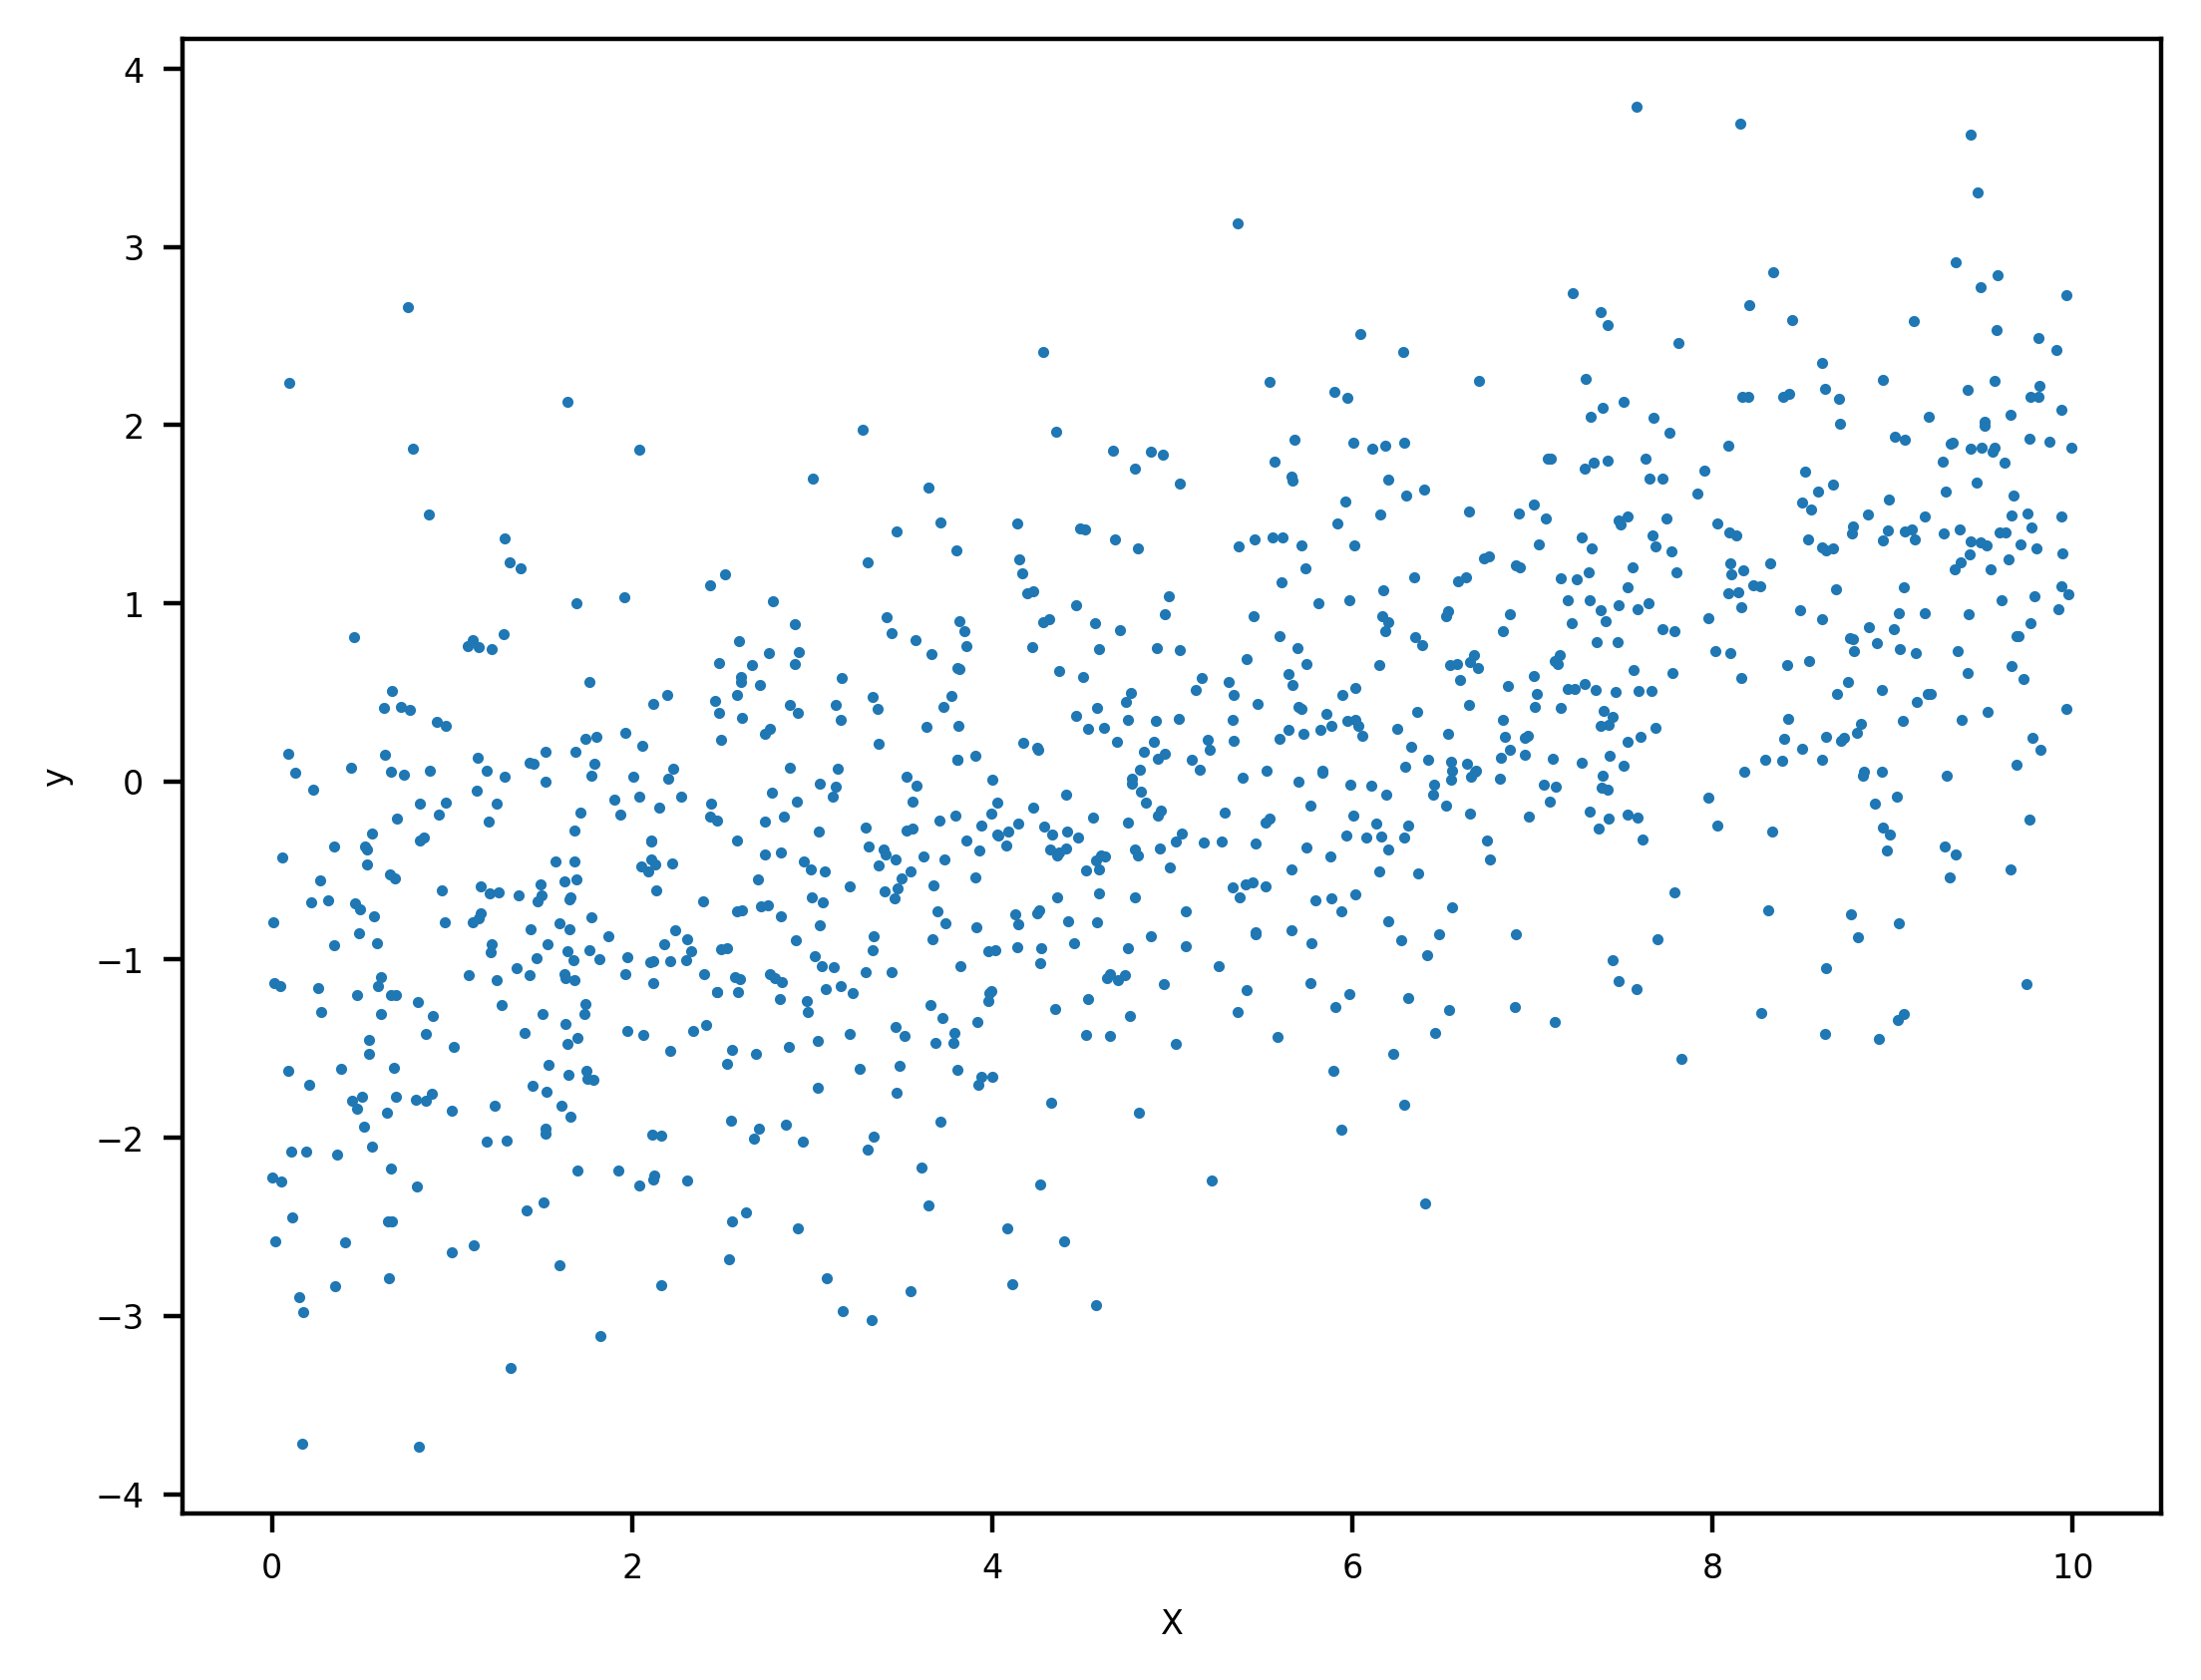

In [197]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 6
#plt.figure(figsize=(12,8))
plt.scatter(X, y, s=1)
plt.xlabel('X')
plt.ylabel('y')
#plt.tight_layout()
plt.show()

In [198]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression(fit_intercept=True,\
                           copy_X=True, n_jobs=None)   # default parameters used so output below shows no values
lin_reg

LinearRegression()

In [199]:
# fit a linear regression
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2522197212675916
[0.25711689]


In [200]:
# predict over the training data
y_pred = lin_reg.predict(X.reshape(-1,1))

Text(0, 0.5, 'y')

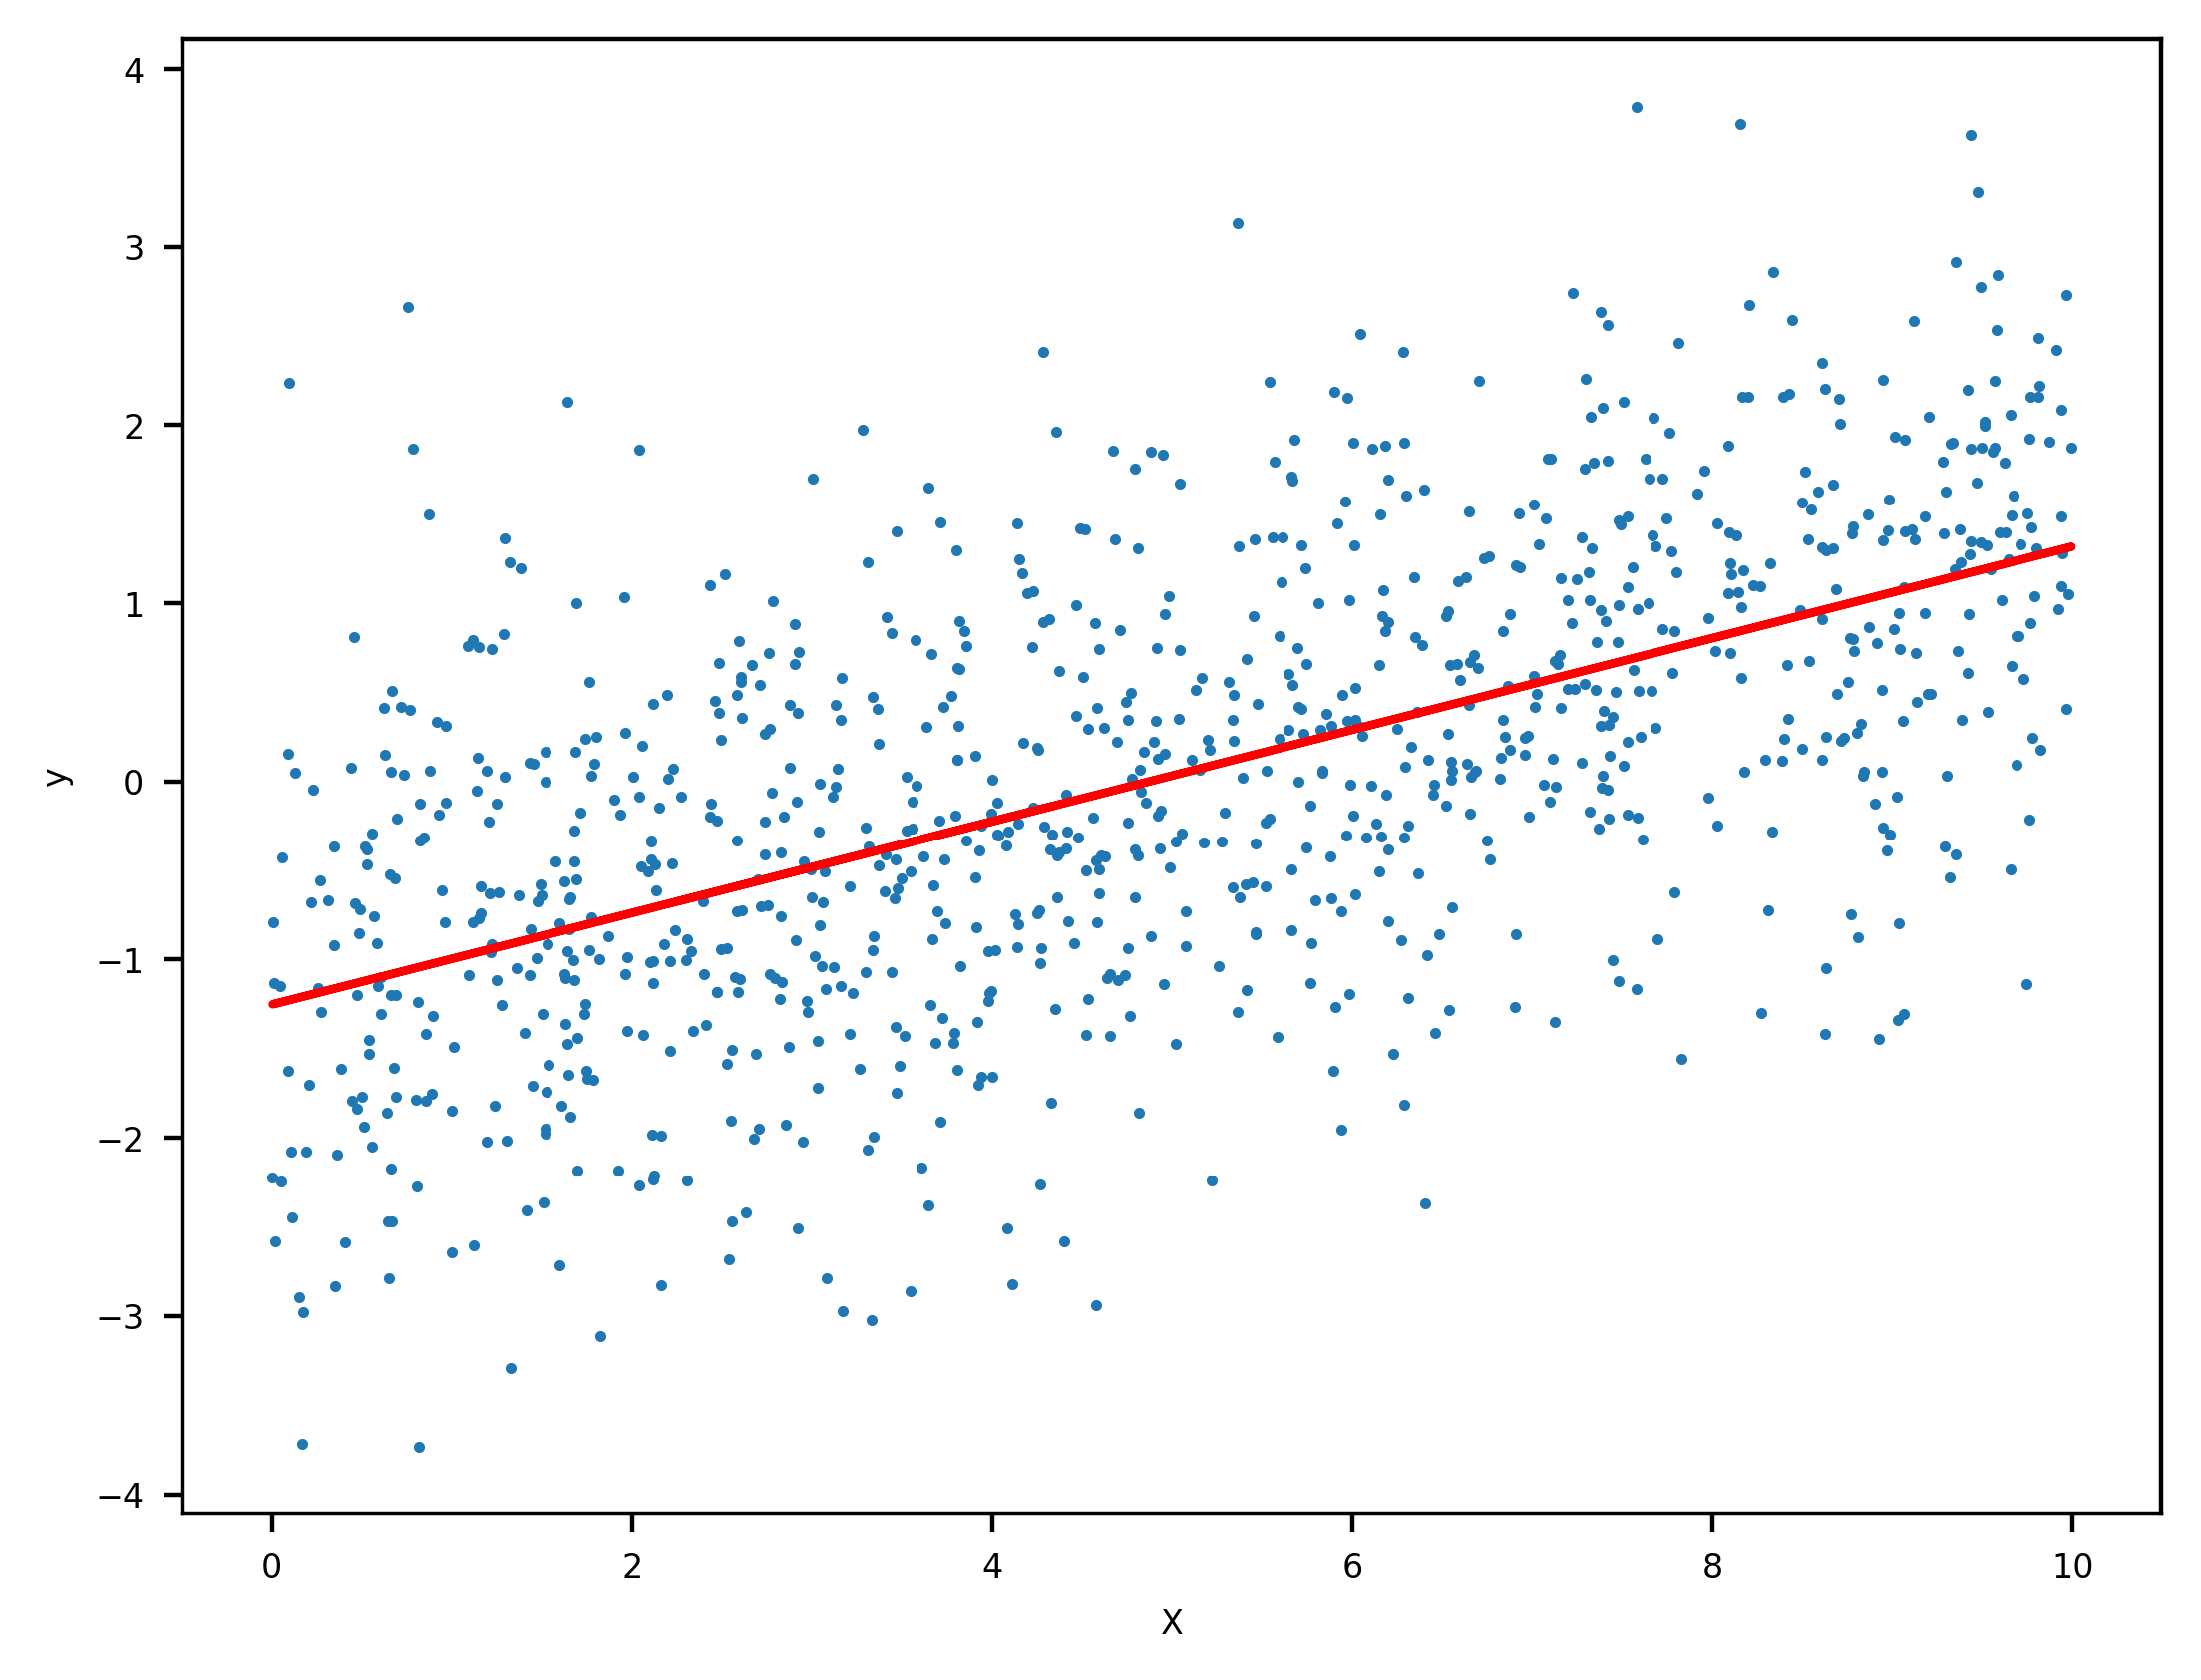

In [201]:
# Plottting the predictions agains the data

plt.scatter(X,y,s=1)
plt.plot(X,y_pred, 'r')
plt.xlabel('X')
plt.ylabel('y')

In [202]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1),\
                                                    df['default payment next month'].values,\
                                                        test_size=0.2,
                                                        random_state=24)

In [203]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [204]:
np.mean(y_train)

0.223102526838873

In [205]:
np.mean(y_test)

0.21657603600225014

In [206]:
example_lr = LogisticRegression(C=0.1,
                                solver='liblinear')
example_lr

LogisticRegression(C=0.1, solver='liblinear')

In [207]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [208]:
y_pred = example_lr.predict(X_test)

In [209]:
# accuracy calculation by taking the mean of a boolean mask
is_correct = y_pred == y_test

In [210]:
np.mean(is_correct)

0.7834239639977498

In [211]:
# accuracy calculation using .score method of estimator
example_lr.score(X_test, y_test)

0.7834239639977498

In [212]:
# accuracy calculation using metrics library's accuracy_score
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

#### Calculating the True and False Positive and Negative Rates and Confusion Matrix

True positive rate is the proportion of positive  samples that were correctly (true positives) predicted as positive.

$TPR=\frac{TP}{P}$

The flip side of the true positive rate is the false negative rate (FNR). False positive rate which is the proportion of positive samples that were incorrectly  (false negatives) predicted as negative. 

$FNR=\frac{FN}{P}$

The sum of the true positives and false negatives equal the total number of positive samples. Thus the sum of the true positive rate (TPR) and the false negative rate (FNR) equals 1.

$P=TP+FN$

$TPR+FNR=1$

For the negative class we have the true negative rate and the false positive rate. If N is the number of negative samples, true negative TN is the number of negative samples that are correctly predicted as negative; false positive is the number of negative samples that are incorrectly predicted as positive. Dividing the true negative by the negative class gives the true negative rate; dividing the false positive by the negative class gives the false positive rate.

$TNR=\frac{TN}{N}$

$FPR=\frac{FP}{N}$

$N=TN+FP$

$TNR+FPR=1$


In [213]:
# number of positive samples
P = sum(y_test)                                 # we are summing the resulting boolean array
P

1155

In [214]:
# true positives
TP = sum( (y_test == 1) & (y_pred == 1))
TP

0

In [215]:
# true positive rate
TPR = TP / P
TPR

0.0

In [216]:
# false negatives
FN = sum( (y_pred == 0) & (y_test == 1))
FN

1155

In [217]:
# false negative rate
FNR = FN / P
FNR

1.0

In [218]:
# the number of negative samples
N = sum(y_test == 0)             
N       

4178

In [219]:
# true negative
TN = sum( (y_pred == 0)  &  (y_test == 0))
TN

4178

In [220]:
# false positive
FP = sum( (y_pred == 1) & (y_test == 0))
FP

0

In [221]:
# true negative rate
TNR = TN / N
TNR

1.0

In [222]:
# false positive rate
FPR = FP / N
FPR

0.0

The model so far, acts as a majority-class null model. Every positive class was predicted to be negative, so none of them was correctly predicted. Every negative class was predicted to be negative too.

When generating the confusion matrix with scikit-learn, the true class is along the vertical axis, the predicted class is along the horizontal axis and the values are arranged per index ie index 0 for negative class, index 1 for positive class.

$\begin{bmatrix}TN&FP\\FN&TP\end{bmatrix}$

TPR is also called recall or sensitivity ie the proportion of positive samples that are corectly predicted. Precision is the proportion of positive predictions that are correct.

Positive Samples

$TPR=\frac{TP}{P}=\frac{TP}{TP+FN}$  $\;\;\;(aka\;Recall / Sensitivity)$

$FNR=\frac{FN}{P}=\frac{FN}{TP+FN}$

$TPR + FNR = 1$

Negative Samples

$TNR=\frac{TN}{N}=\frac{TN}{TN+FP}$

$FPR=\frac{FP}{N}=\frac{FP}{FP+TN}$

$TNR + FPR = 1$

Positive predictions

$Precision=\frac{TP}{TP+FP}$            

All Predictions

$Accuracy=\frac{TP+TN}{TP+TN+FN+FP}$

In [223]:
metrics.confusion_matrix(y_test, y_pred)  

array([[4178,    0],
       [1155,    0]])

#### Discovering Predicted Probabilities

In [224]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [225]:
prob_sum = np.sum(y_pred_proba, axis=1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [226]:
prob_sum.shape

(5333,)

In [227]:
np.unique(prob_sum)

array([1.])

In [228]:
# probability of a positive class
pos_proba = y_pred_proba[:,1]     # index 0 is the probabilities for class 0, so select index 1 for all rows
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

The histogram functions for matplotlib and numpy all return useful information pertaining to histograms.. They return the number of points in each bin, and location of the bin edges. The matplotlib function also returns the container for the plot.

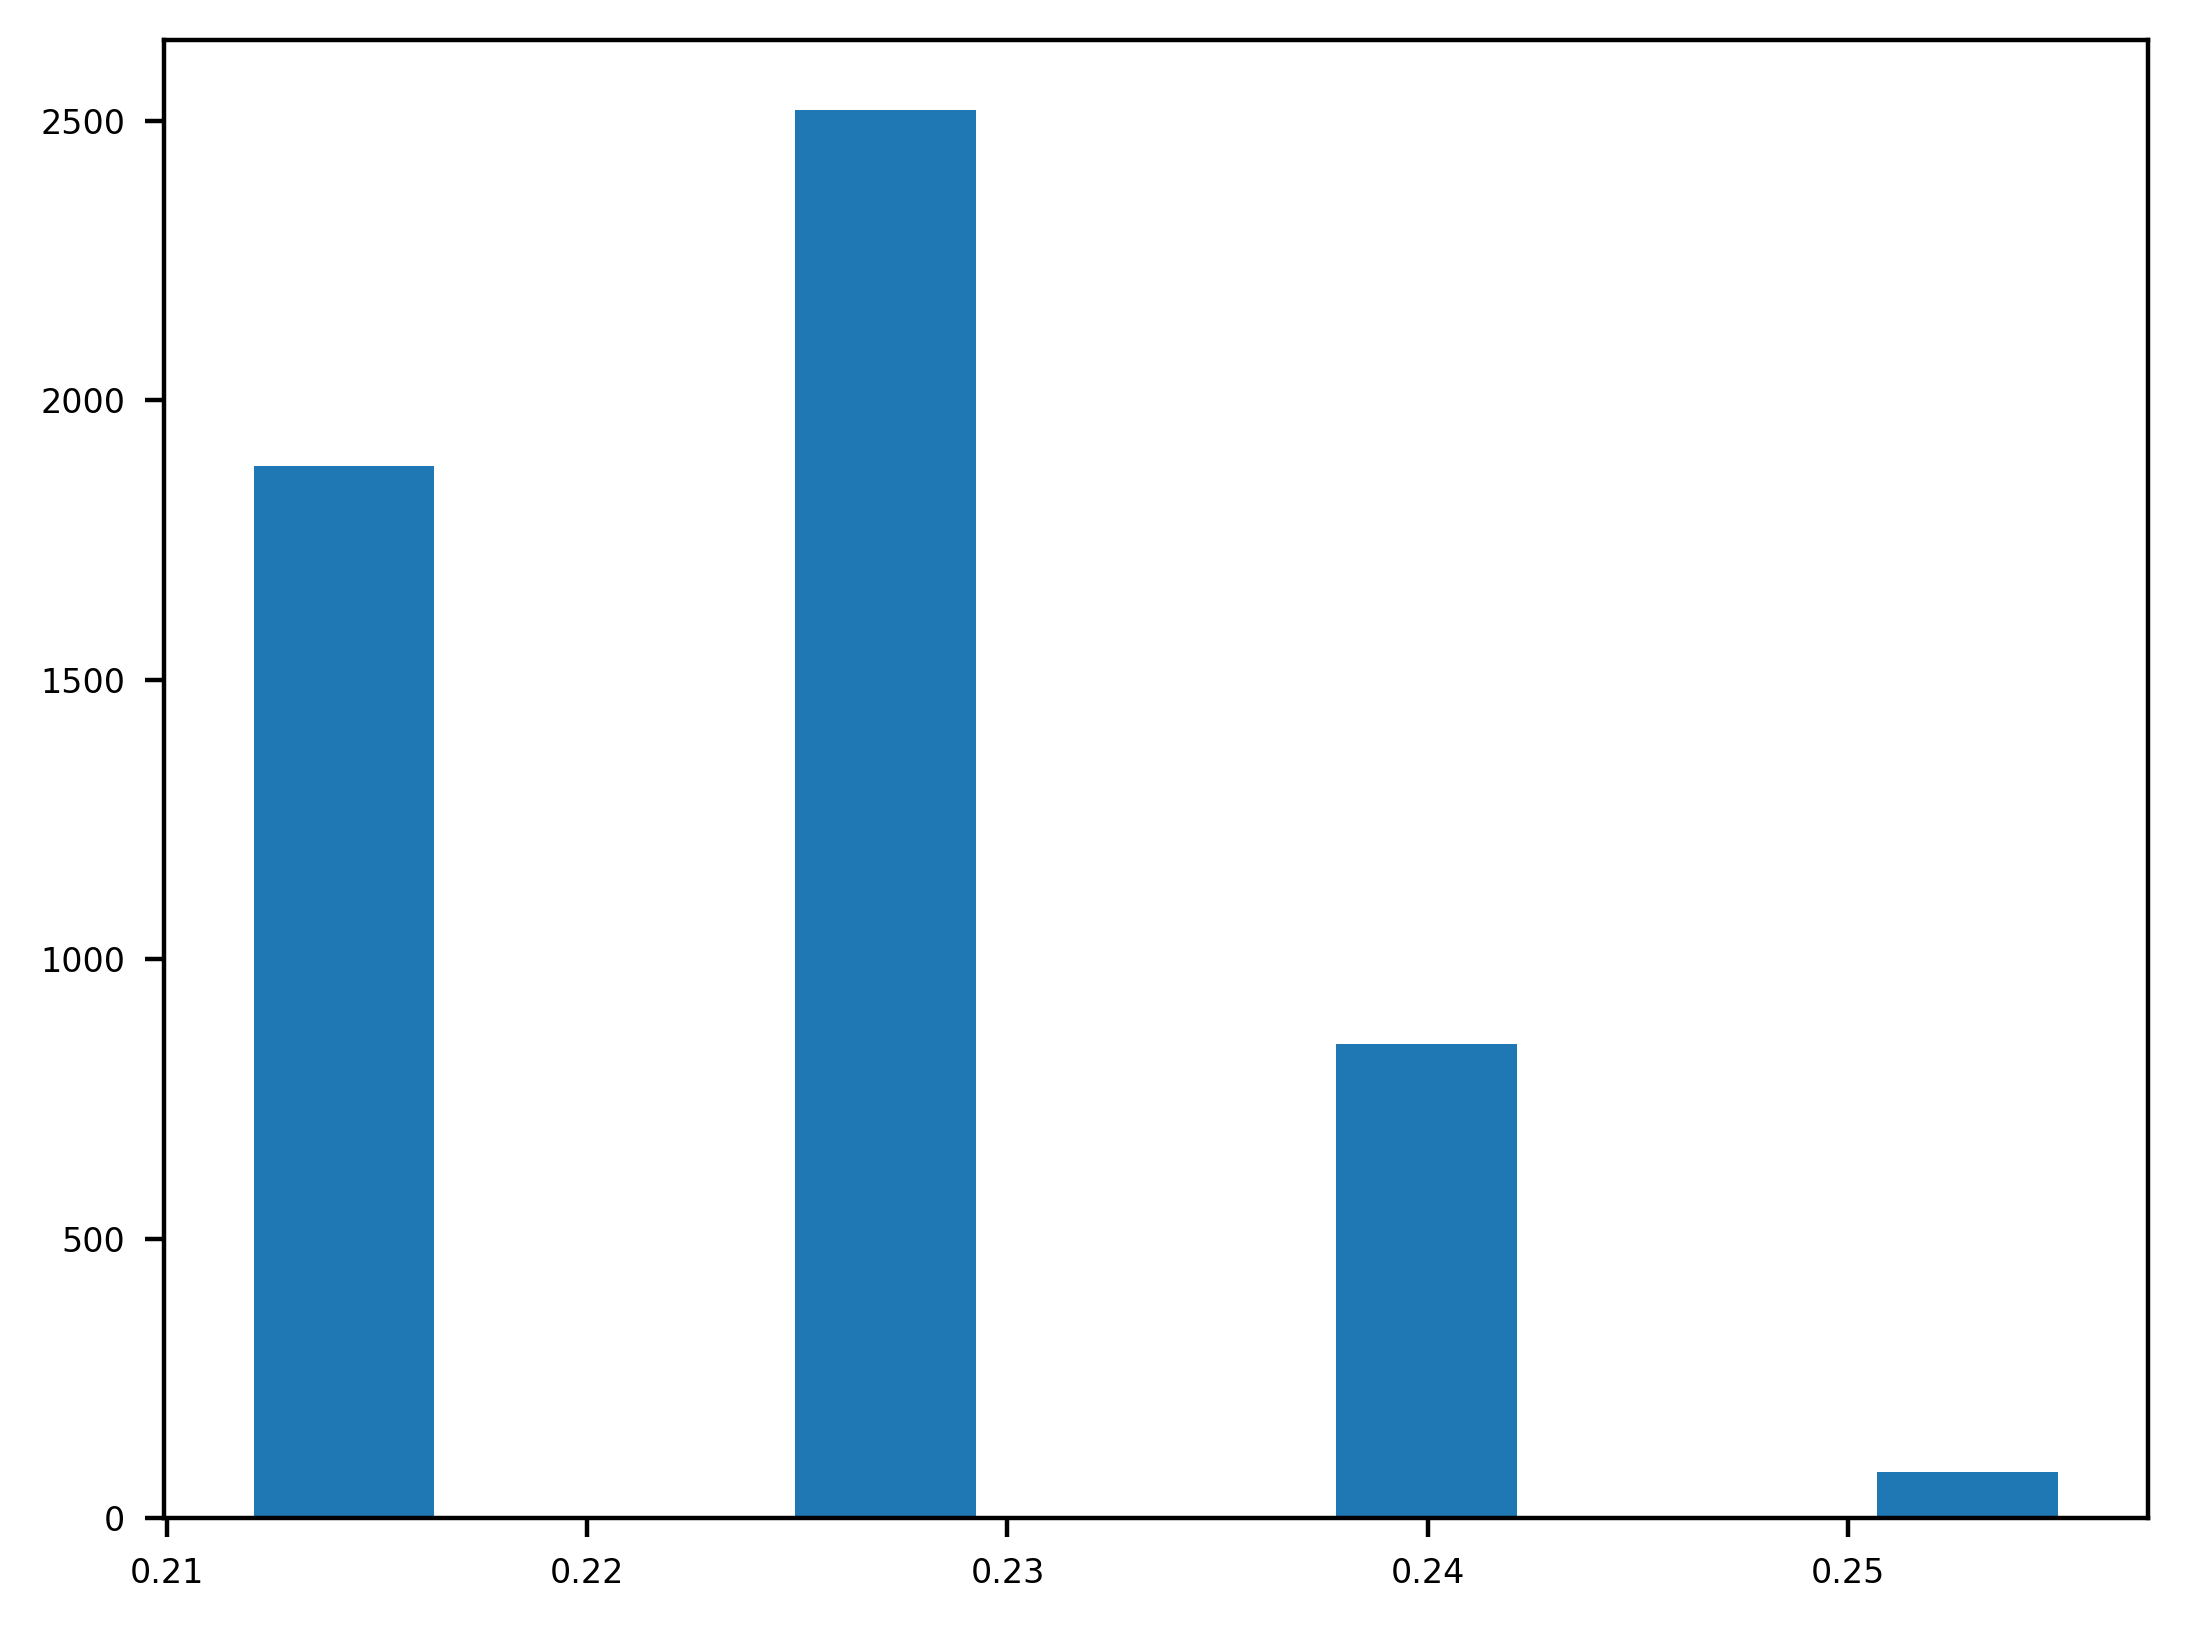

In [229]:
# histogram of probability of positive class
a = plt.hist(pos_proba)    # the matplotlib plt.hist() function

In [230]:
len(a)  

3

In [231]:
a[0]            # number of samples in each bin

array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
         82.])

In [232]:
a[1]            # location of the bin edges

array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
       0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
       0.2549944 ])

In [233]:
a[2]            # container for plot

<BarContainer object of 10 artists>

In [234]:
a = np.histogram(pos_proba)             # Numpy's histogram function

In [235]:
len(a)

2

In [236]:
a[0]        # number of points in each bin

array([1883,    0,    0, 2519,    0,    0,  849,    0,    0,   82])

In [237]:
a[1]        # location of bin edges

array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
       0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
       0.2549944 ])

Text(0, 0.5, 'Number of samples')

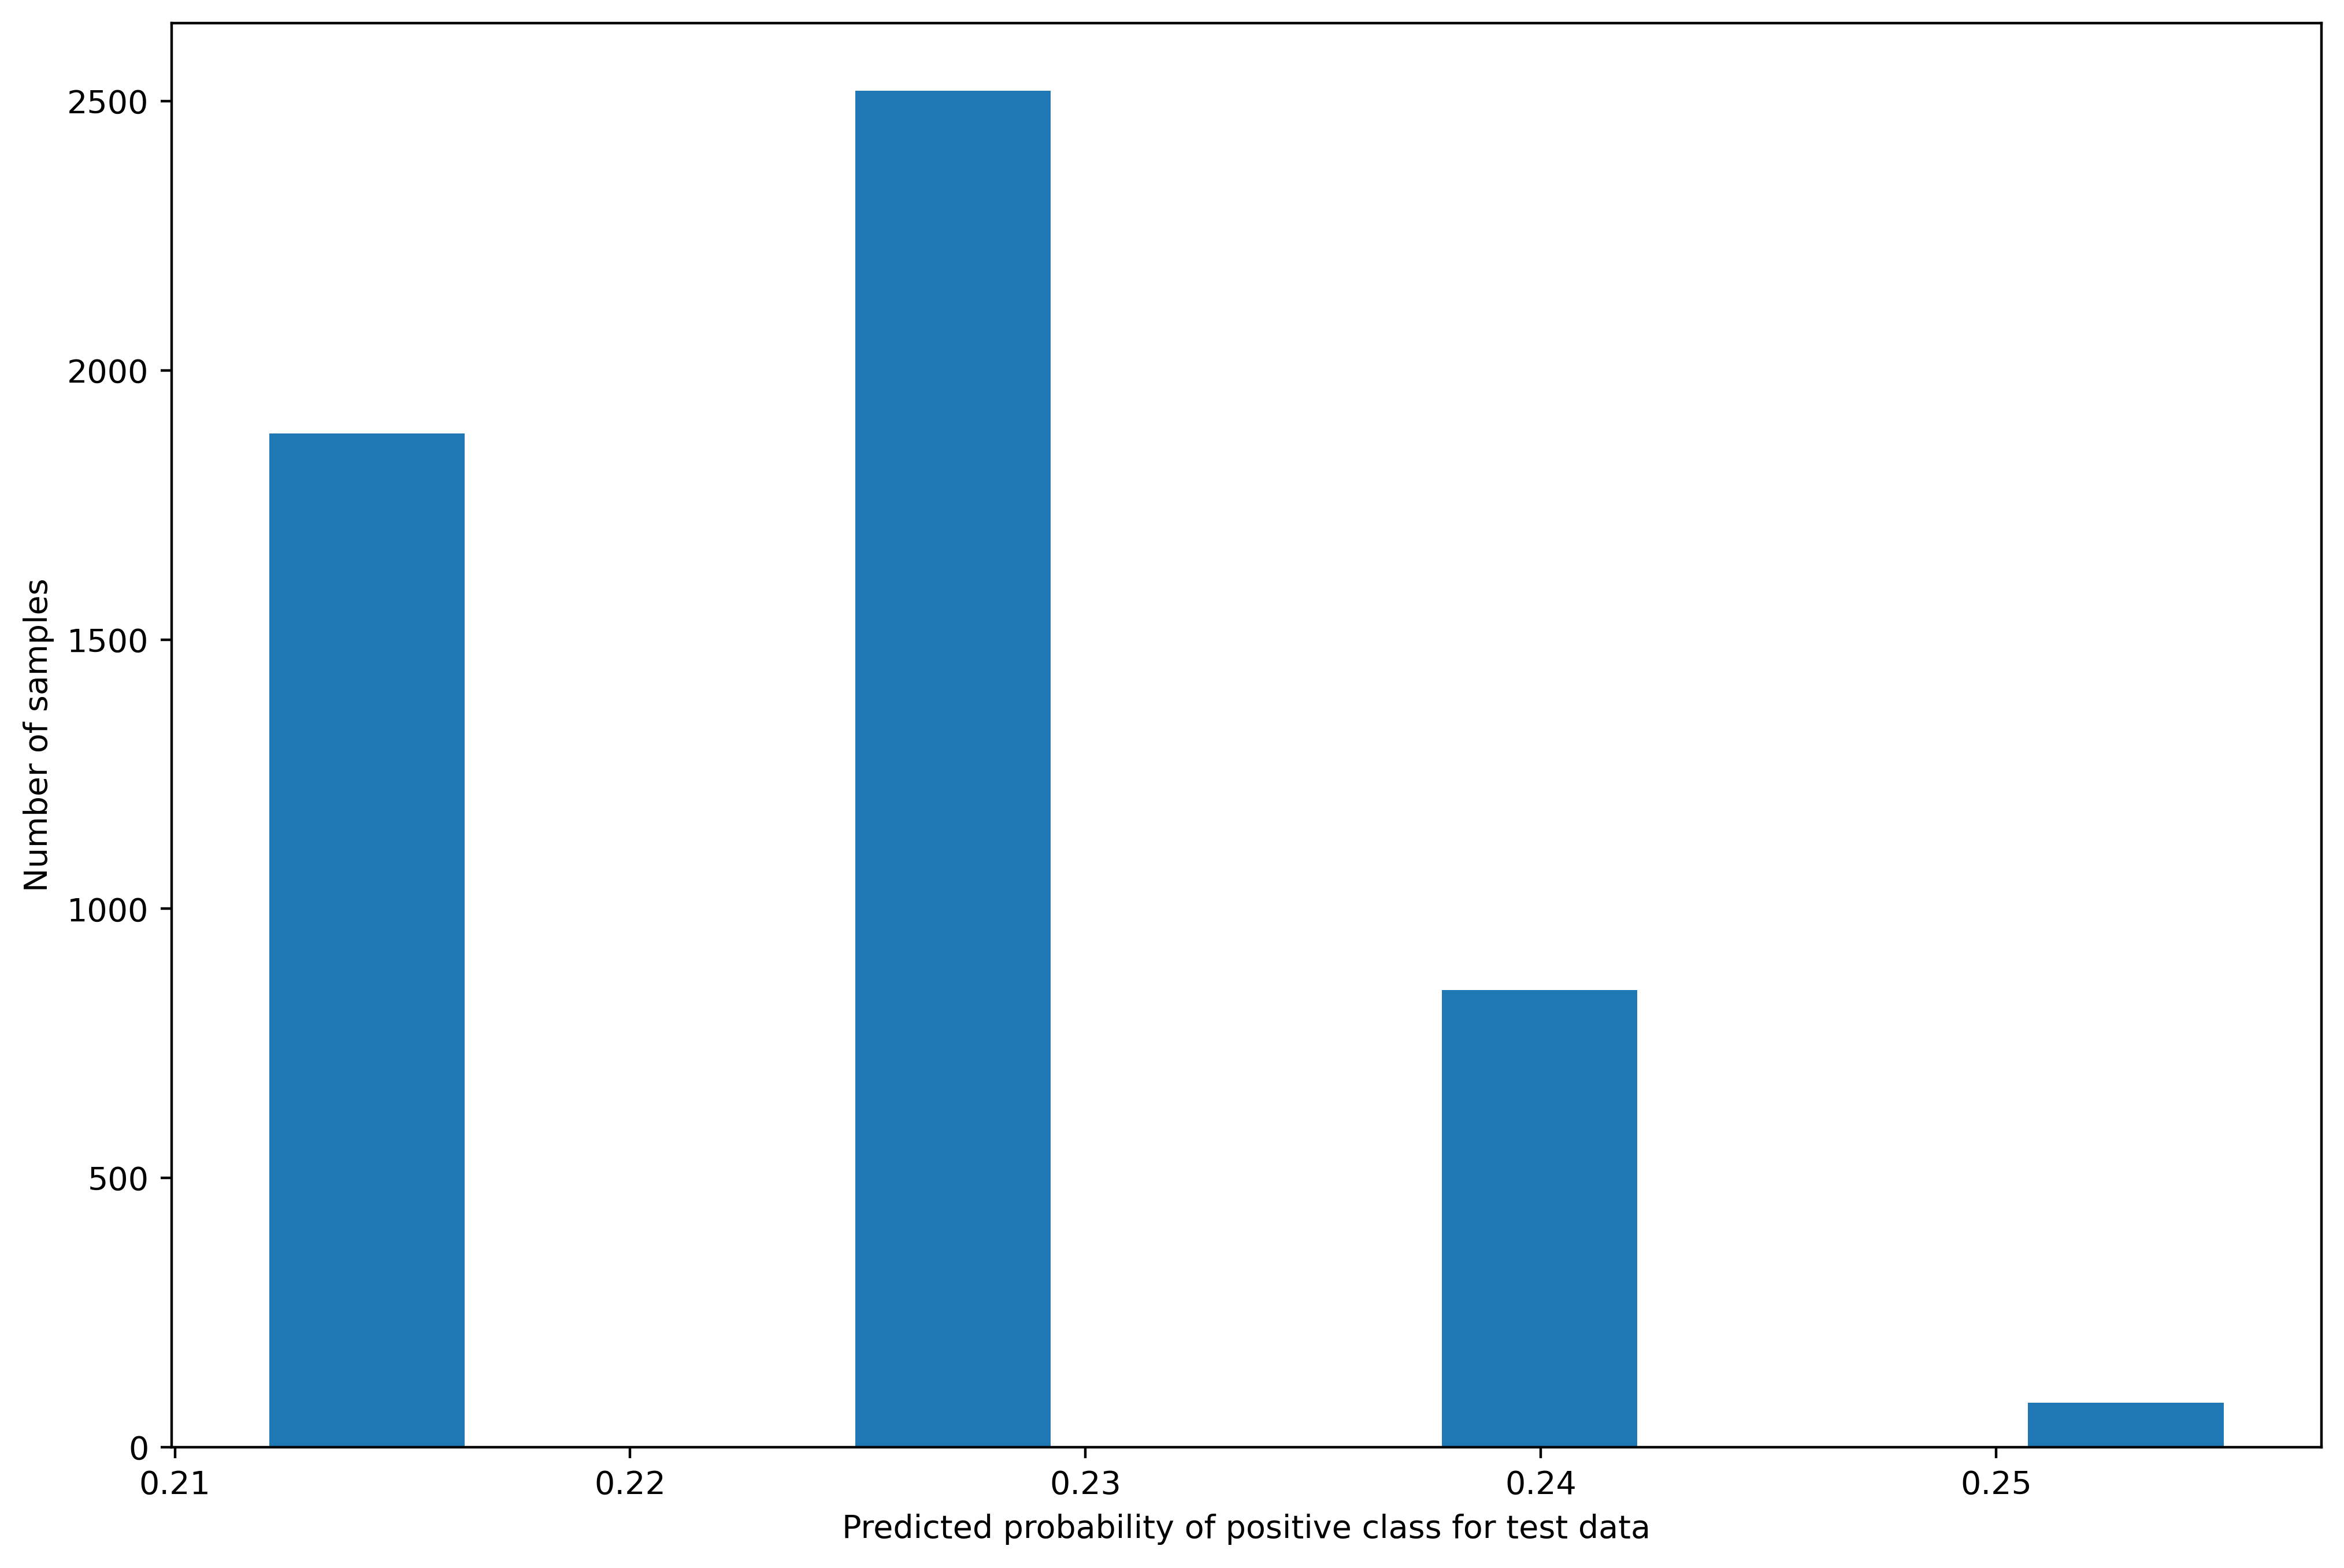

In [238]:
# Plot
mpl.rcParams['font.size'] = 10
plt.figure(figsize=(12,8))
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for test data')
plt.ylabel('Number of samples')

In [239]:
np.argmax(y_pred_proba, axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [245]:
# Isolate predicted probabilities for positive and negative samples
pos_sample_pos_proba = pos_proba[y_test == 1]
neg_sample_pos_proba = pos_proba[y_test == 0]

In [246]:
pos_proba.shape

(5333,)

In [247]:
neg_sample_pos_proba.shape

(4178,)

#### The Receiver Operating Characteristic (ROC) Curve

Suppose we wanted to move our threshold, from the default 0.5 to 0.25, how much will that improve our TPR and FPR. Looking at the stacked histogram, most of the sample with a predicted probability of positive class above 0.25 are actually negative samples. This means such a change will worsen our FPR (increase) without much improvement to TPR.

Text(0, 0.5, 'Number of samples')

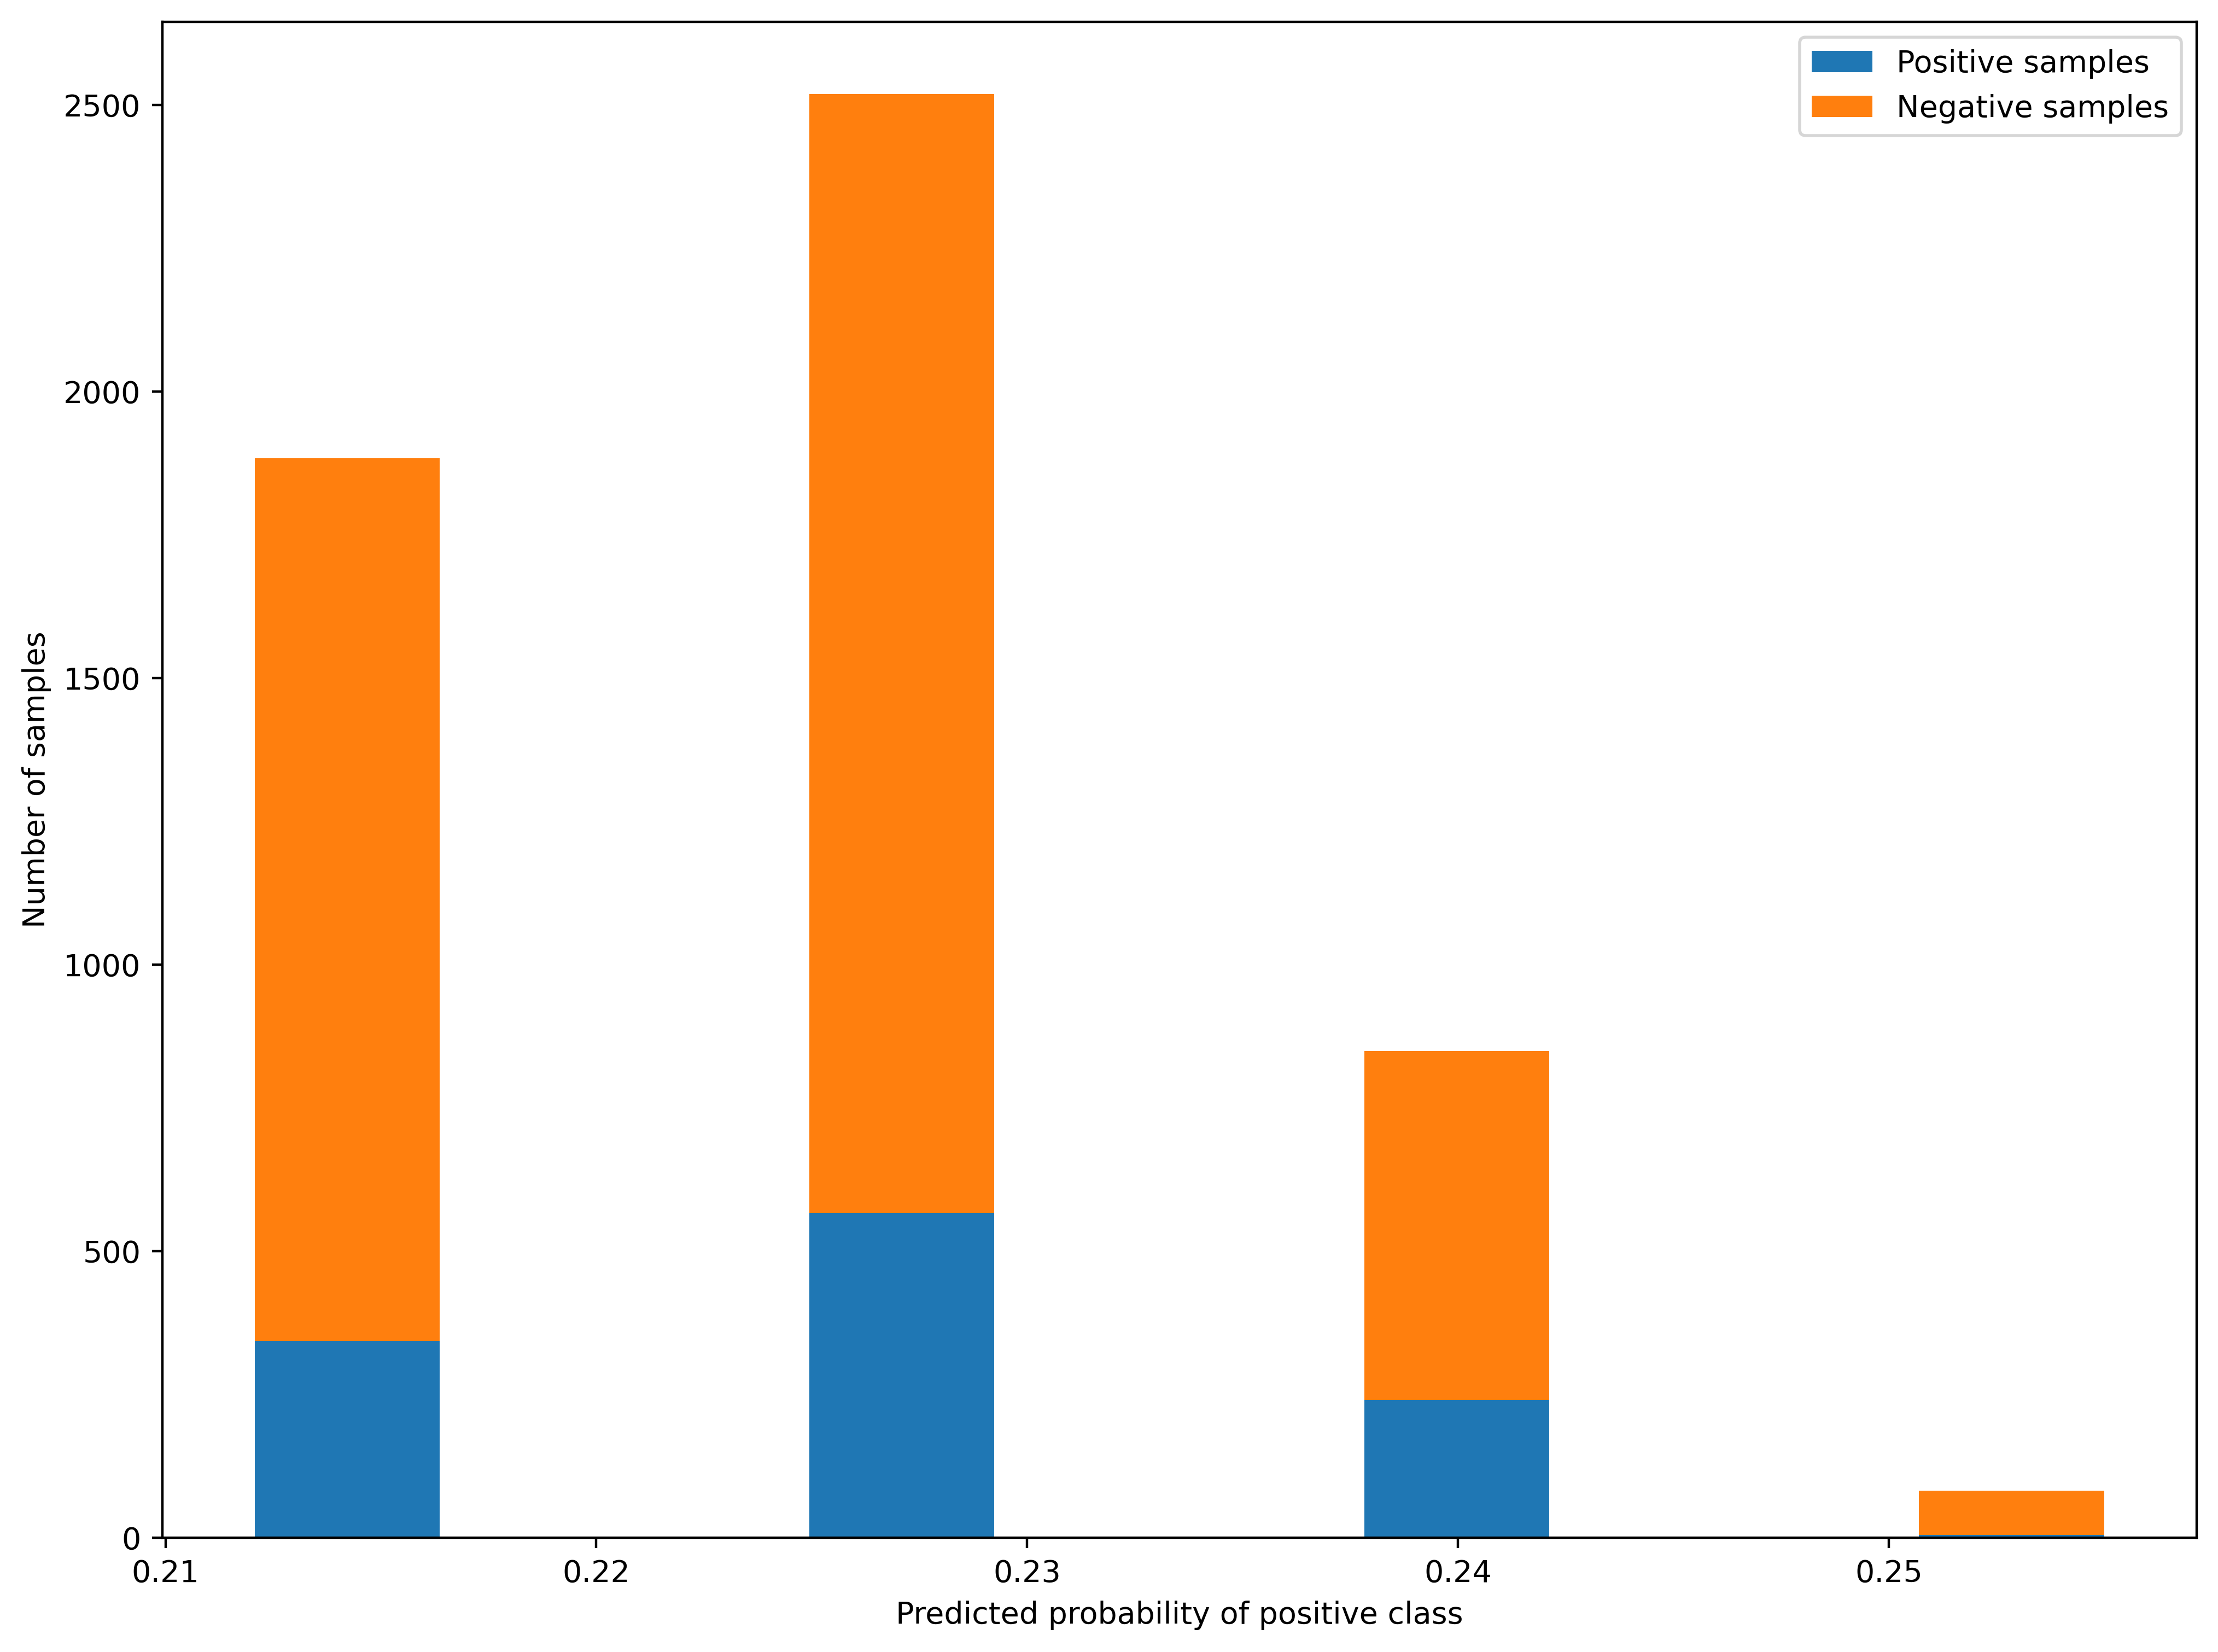

In [252]:
# Plot a stacked histogram
plt.figure(figsize=(12,9))
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],\
          histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Deciding on a threshold for a classifier is a question of finding a "sweet spot" where we are successfully recovering enough true positives, without incurring too many false positives. The receiver operating characterisitc (ROC) curve is a plot of the pairs of TPRs (y-axis) and FPRs (x-axis) that result from lowering the threshold down from 1 all the way to 0.

The equation used for logistic regression technically doesnt allow the probabilities to be exactly 0 or 1. So if we set the threshold to 1, there are no positive predictions, the TPR and FPR are both 0, so the ROC curve starts out at (0,0). As the threshold is lowered, the TPR will start to increase, hopefully faster than the FPR if its a good classifier. Eventually, when the threshold is lowered all the way to 0, every sample will is predicted to be positive, both positive and negative samples, meaning TPR is 1 and FPR is 1. In this way, it is possible to get a complete picture of the performance of the classifier at all different thresholds to decide which one to use.

The scikit-learn function for generating the roc curve takes the true labels and the predicted probabilities of positive class (index 1 of predict_proba output) and returns fpr, tpr, thresholds arrays. A plot of roc has fpr on the x-axis, tpr on y-axis.

In [256]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba) # true labels and predicted pos class probabilities

Text(0.5, 1.0, 'ROC curve')

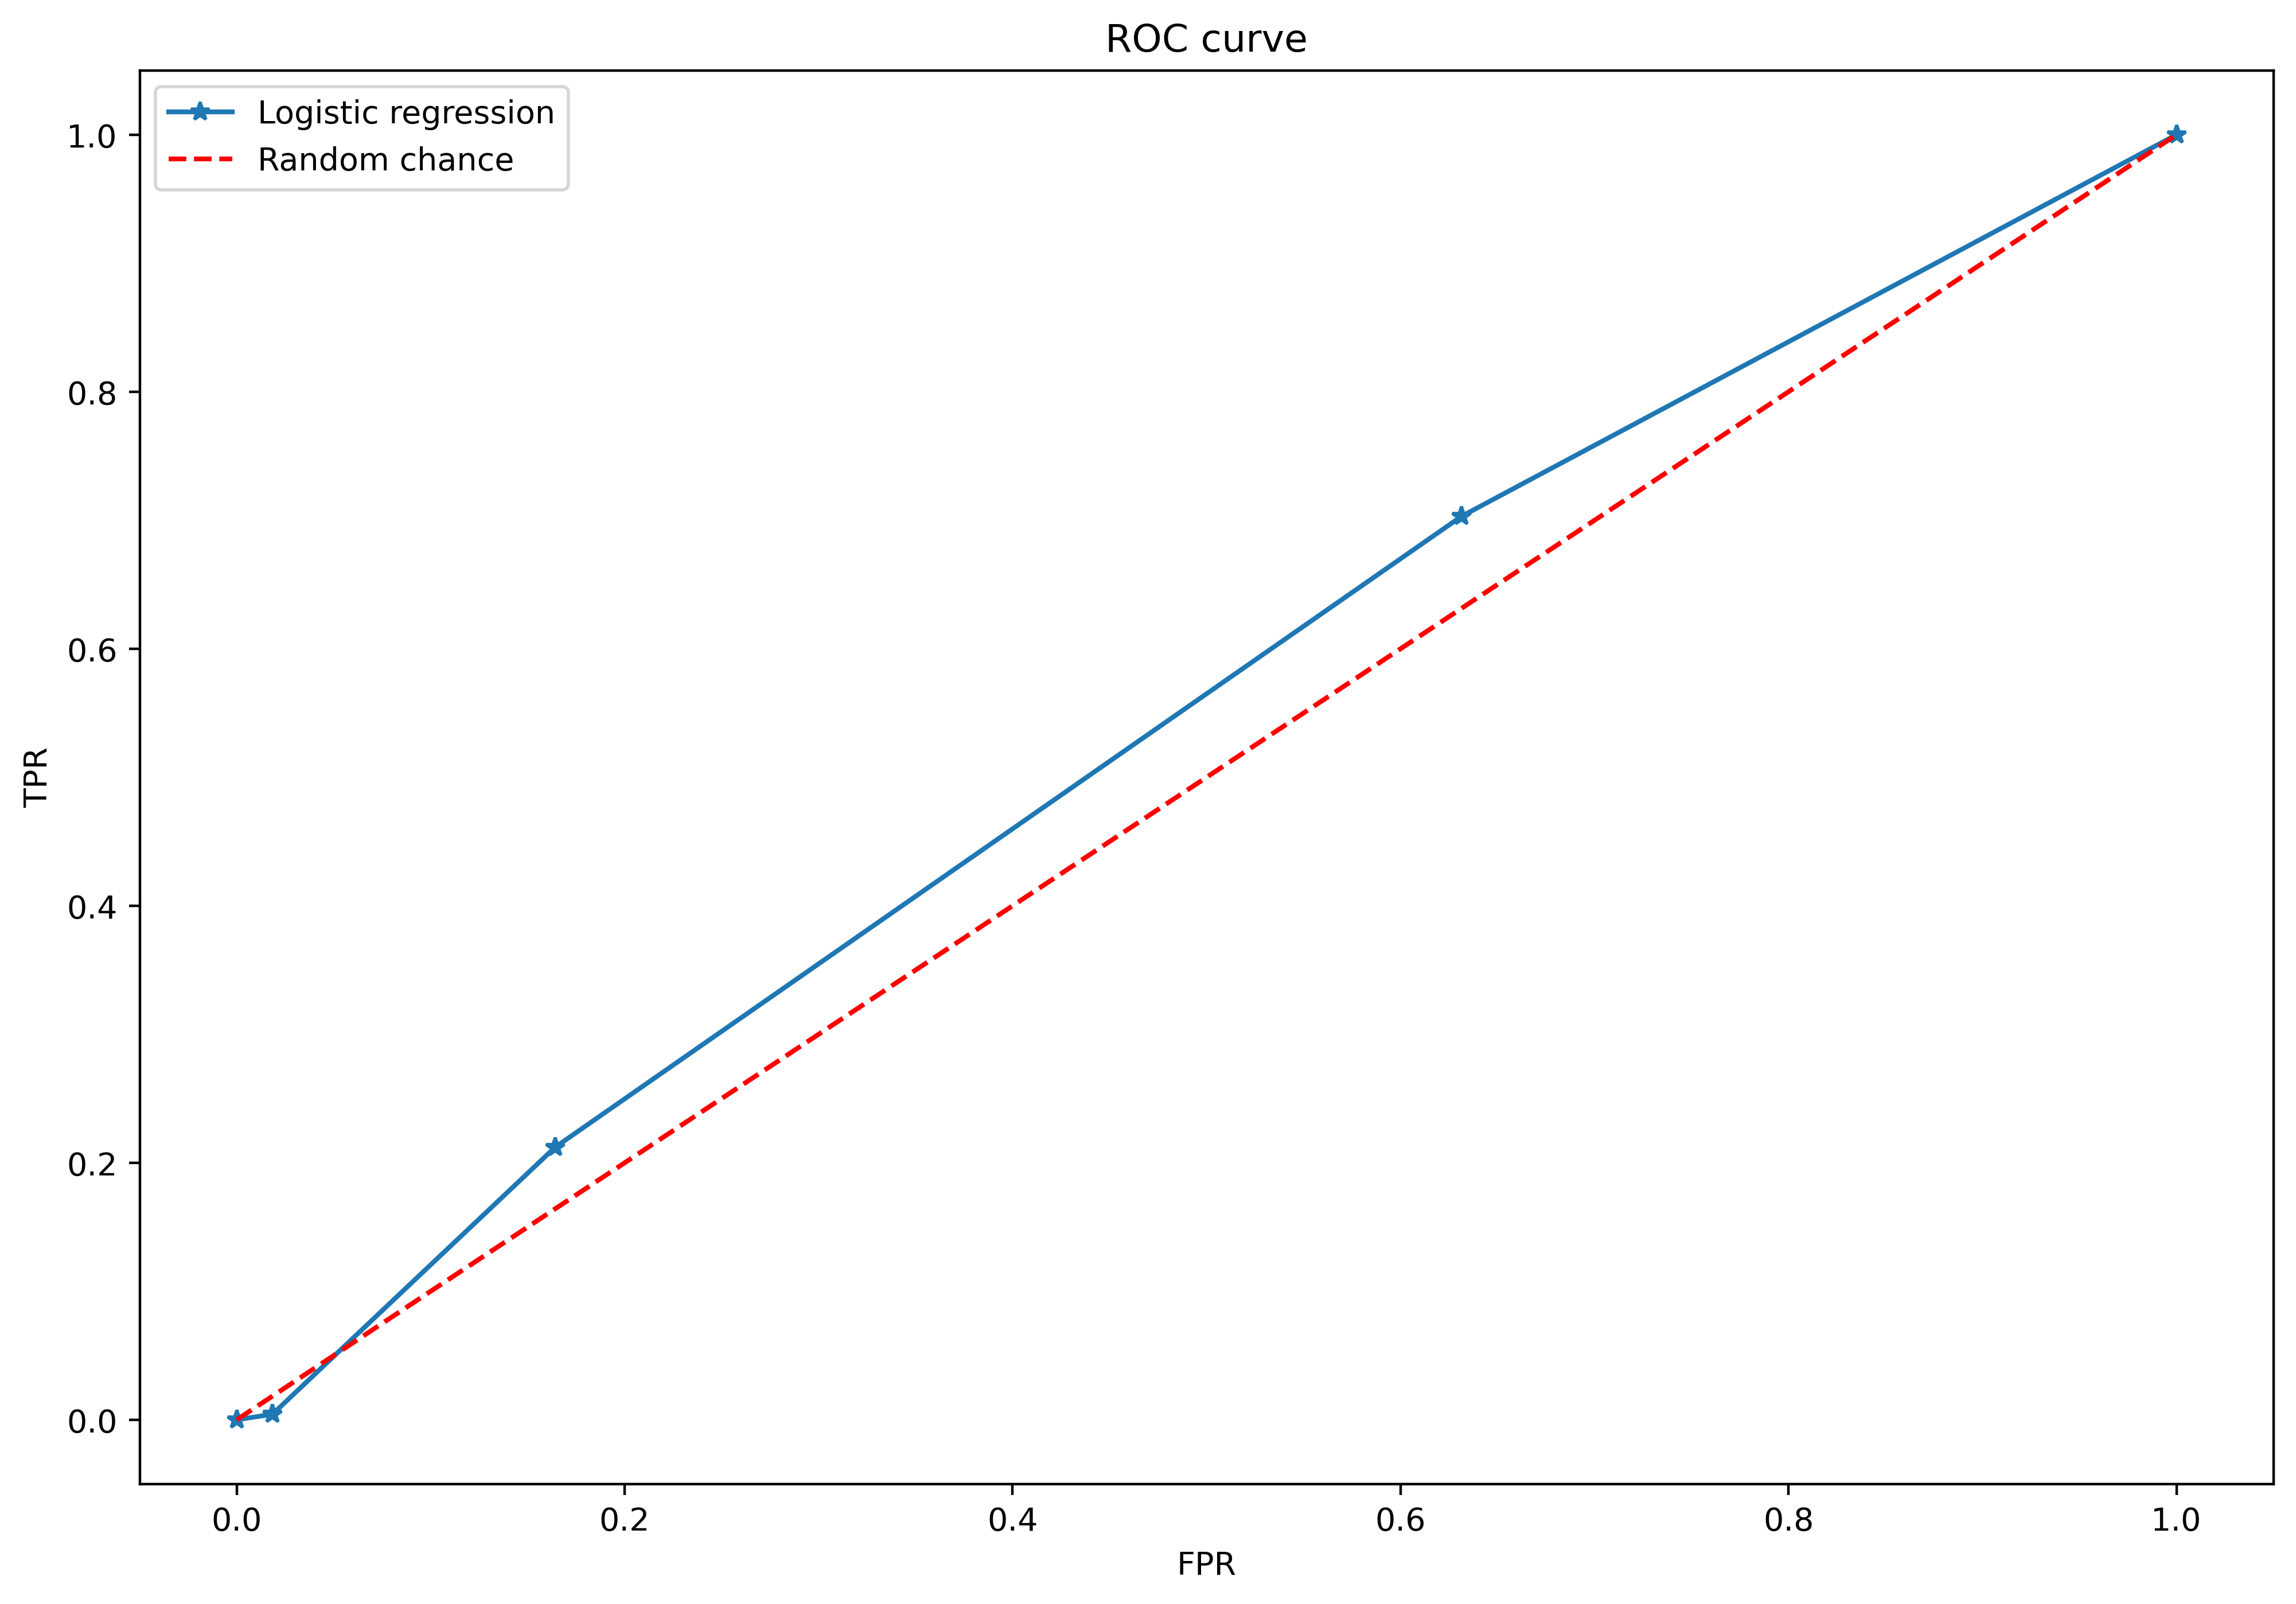

In [258]:
# code to plot the roc plot
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, '*-')            # x values, y values
plt.plot([0,1], [0,1], 'r--')       # x values, y values
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [259]:
# the thresholds that lead to the fpr vs tpr plot above
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [260]:
tpr

array([0.        , 0.004329  , 0.21212121, 0.7030303 , 1.        ])

In [261]:
tpr

array([0.        , 0.004329  , 0.21212121, 0.7030303 , 1.        ])

The scikit-learn implementation for calculating the ROC AUC (C-statistic or concordance statistic) takes input in the same format as the roc_curve function ie the true class labels and probability of a positive class.

Precision is also called the positive predictive value. Precision is useful in situations where for every positive model prediction, you are going to take some expensive course of action. If the number of positive samples are small, precision gives a critical assessment of the quality of a classsifier than the ROC AUC.  Precision and recall are often plotted together to assess the quality of positive predictions at the same time considering what fraction of the positive class a model is able to identify.

In [262]:
# Area under the curve (AUC) of the ROC curve
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

In [263]:
# choosing a (probably) more informative feature to build logistic regression model
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1),
                                                            df['default payment next month'].values,
                                                            test_size=0.2, random_state=24)
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [265]:
# Class membership probabilities
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [267]:
# ROC curve for different thresholds
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

In [266]:
# Area under the curve (AUC) of the ROC curve
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])   # takes true labels, probability of a positive class

0.6201990844642832

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

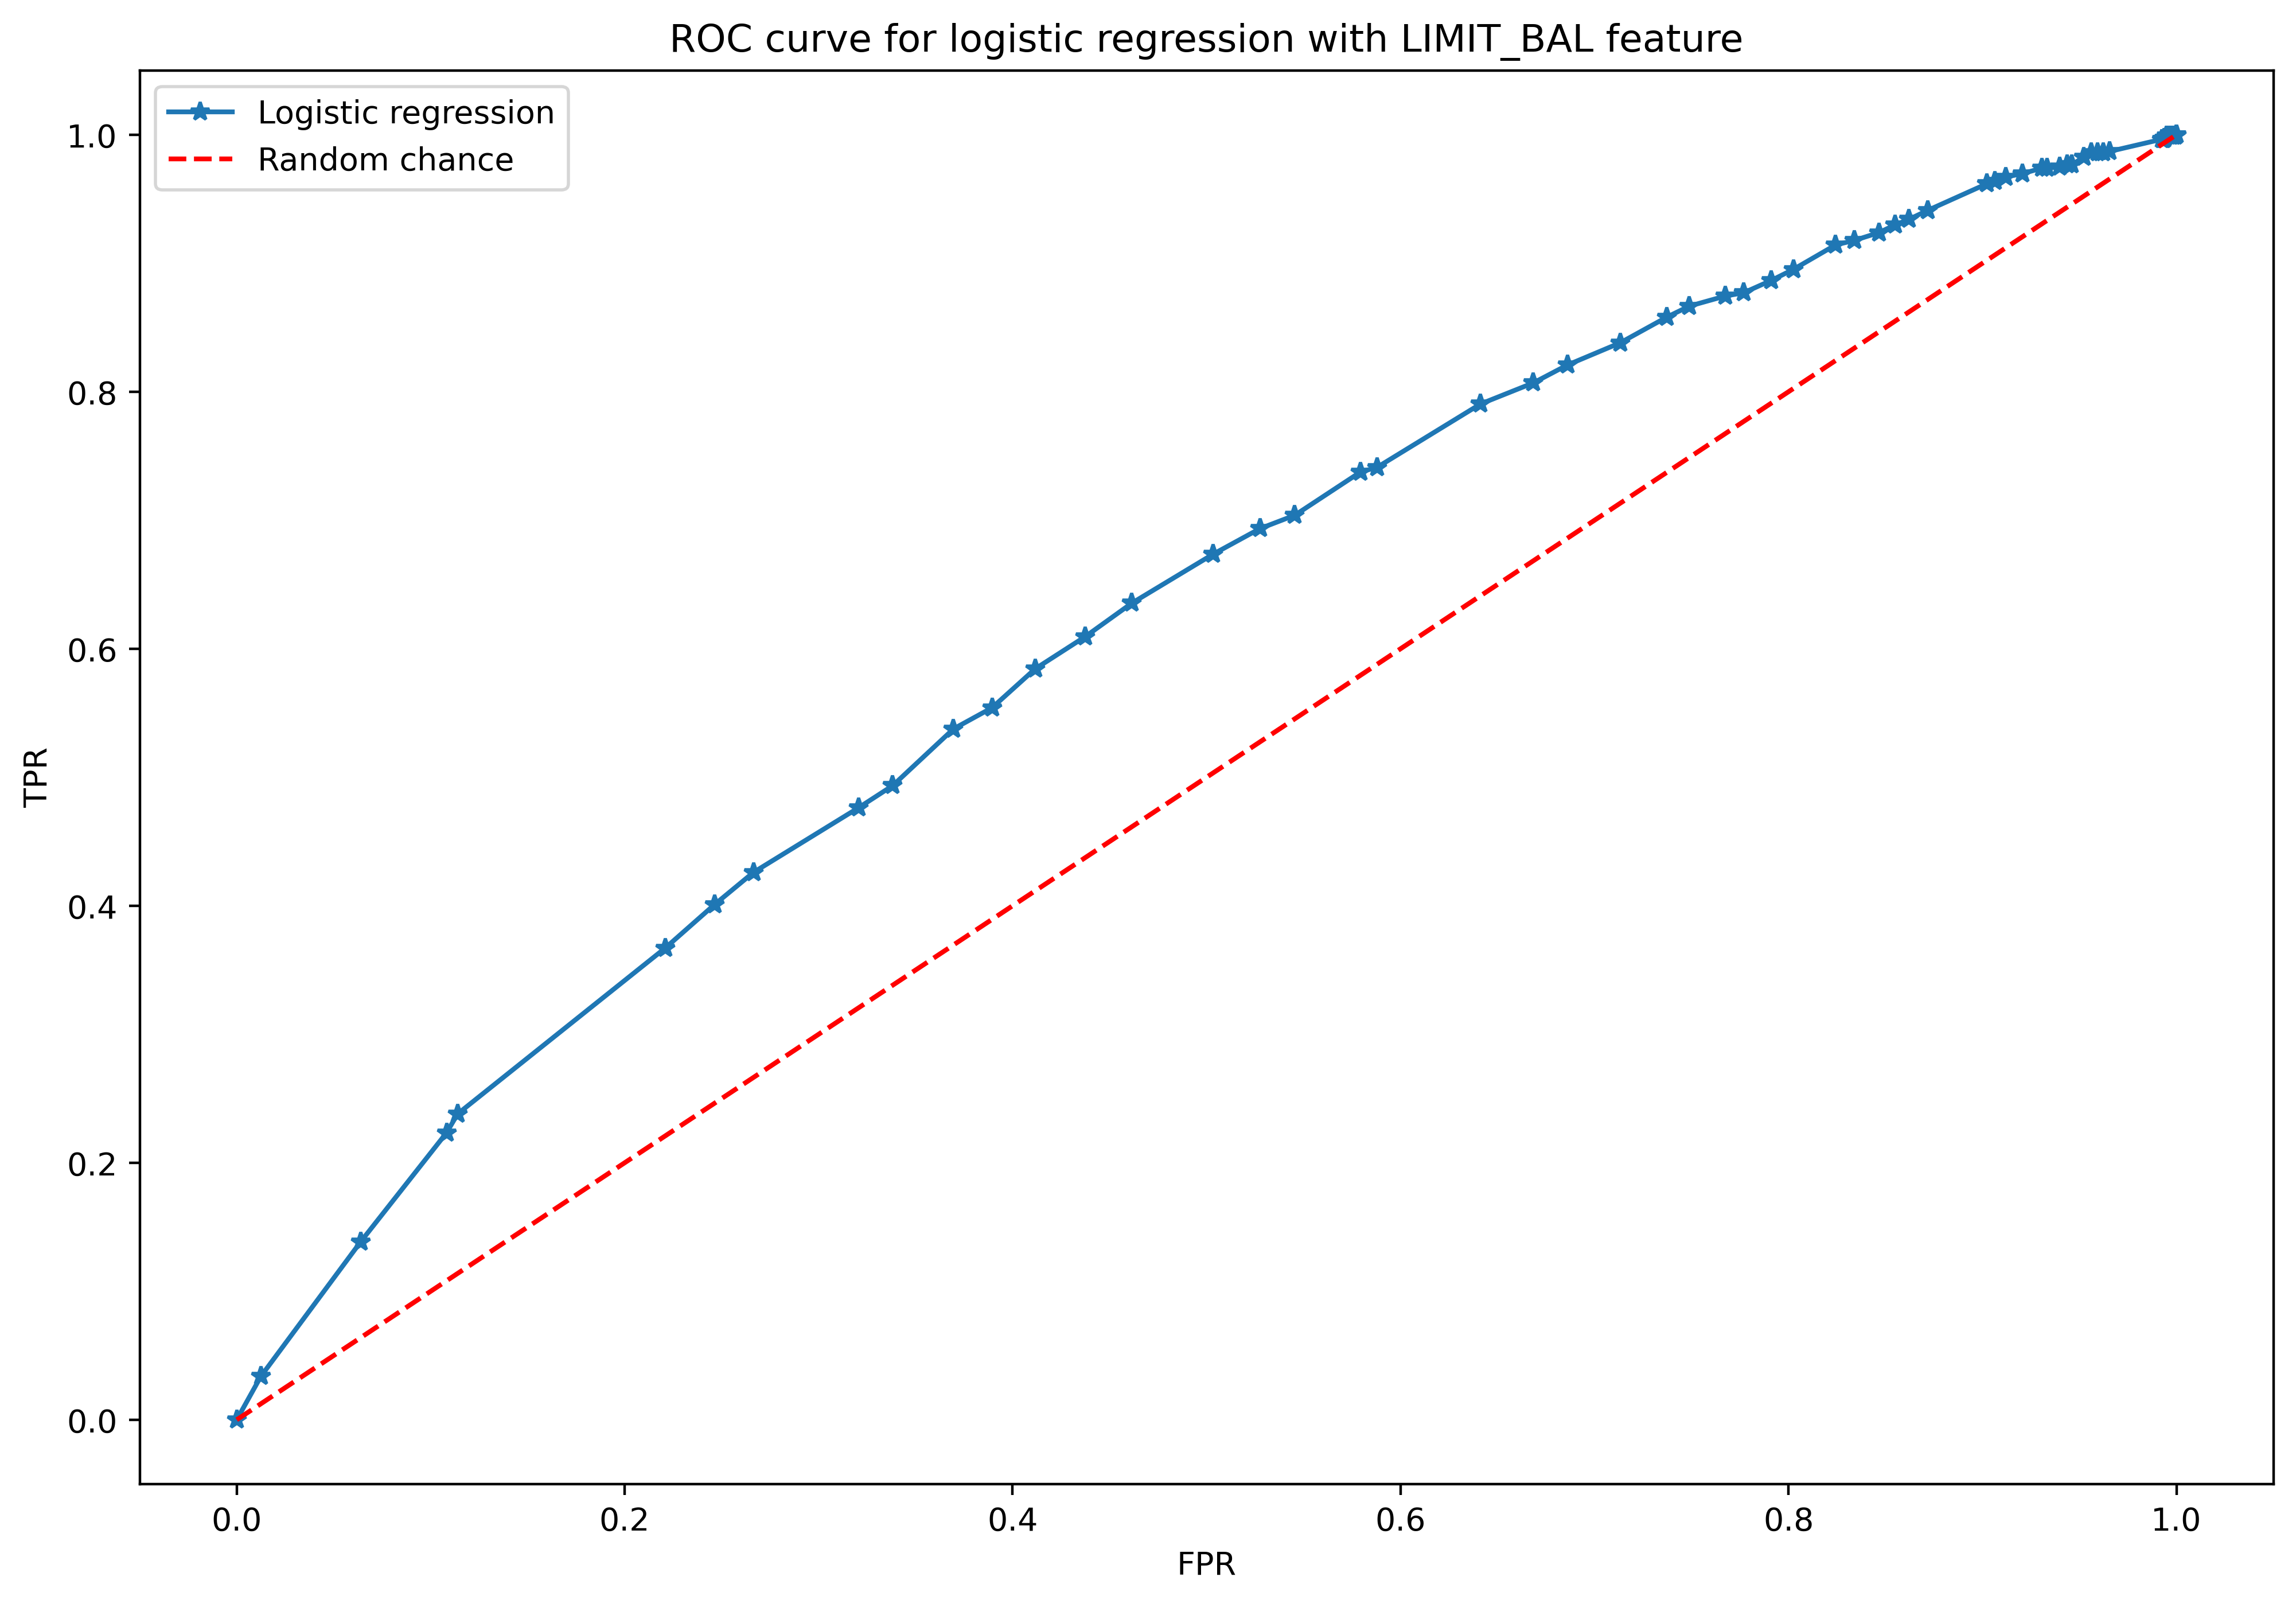

In [268]:
plt.figure(figsize=(12,8))
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [269]:
# Precision-Recall curve
precision, recall, thresh_3 = metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

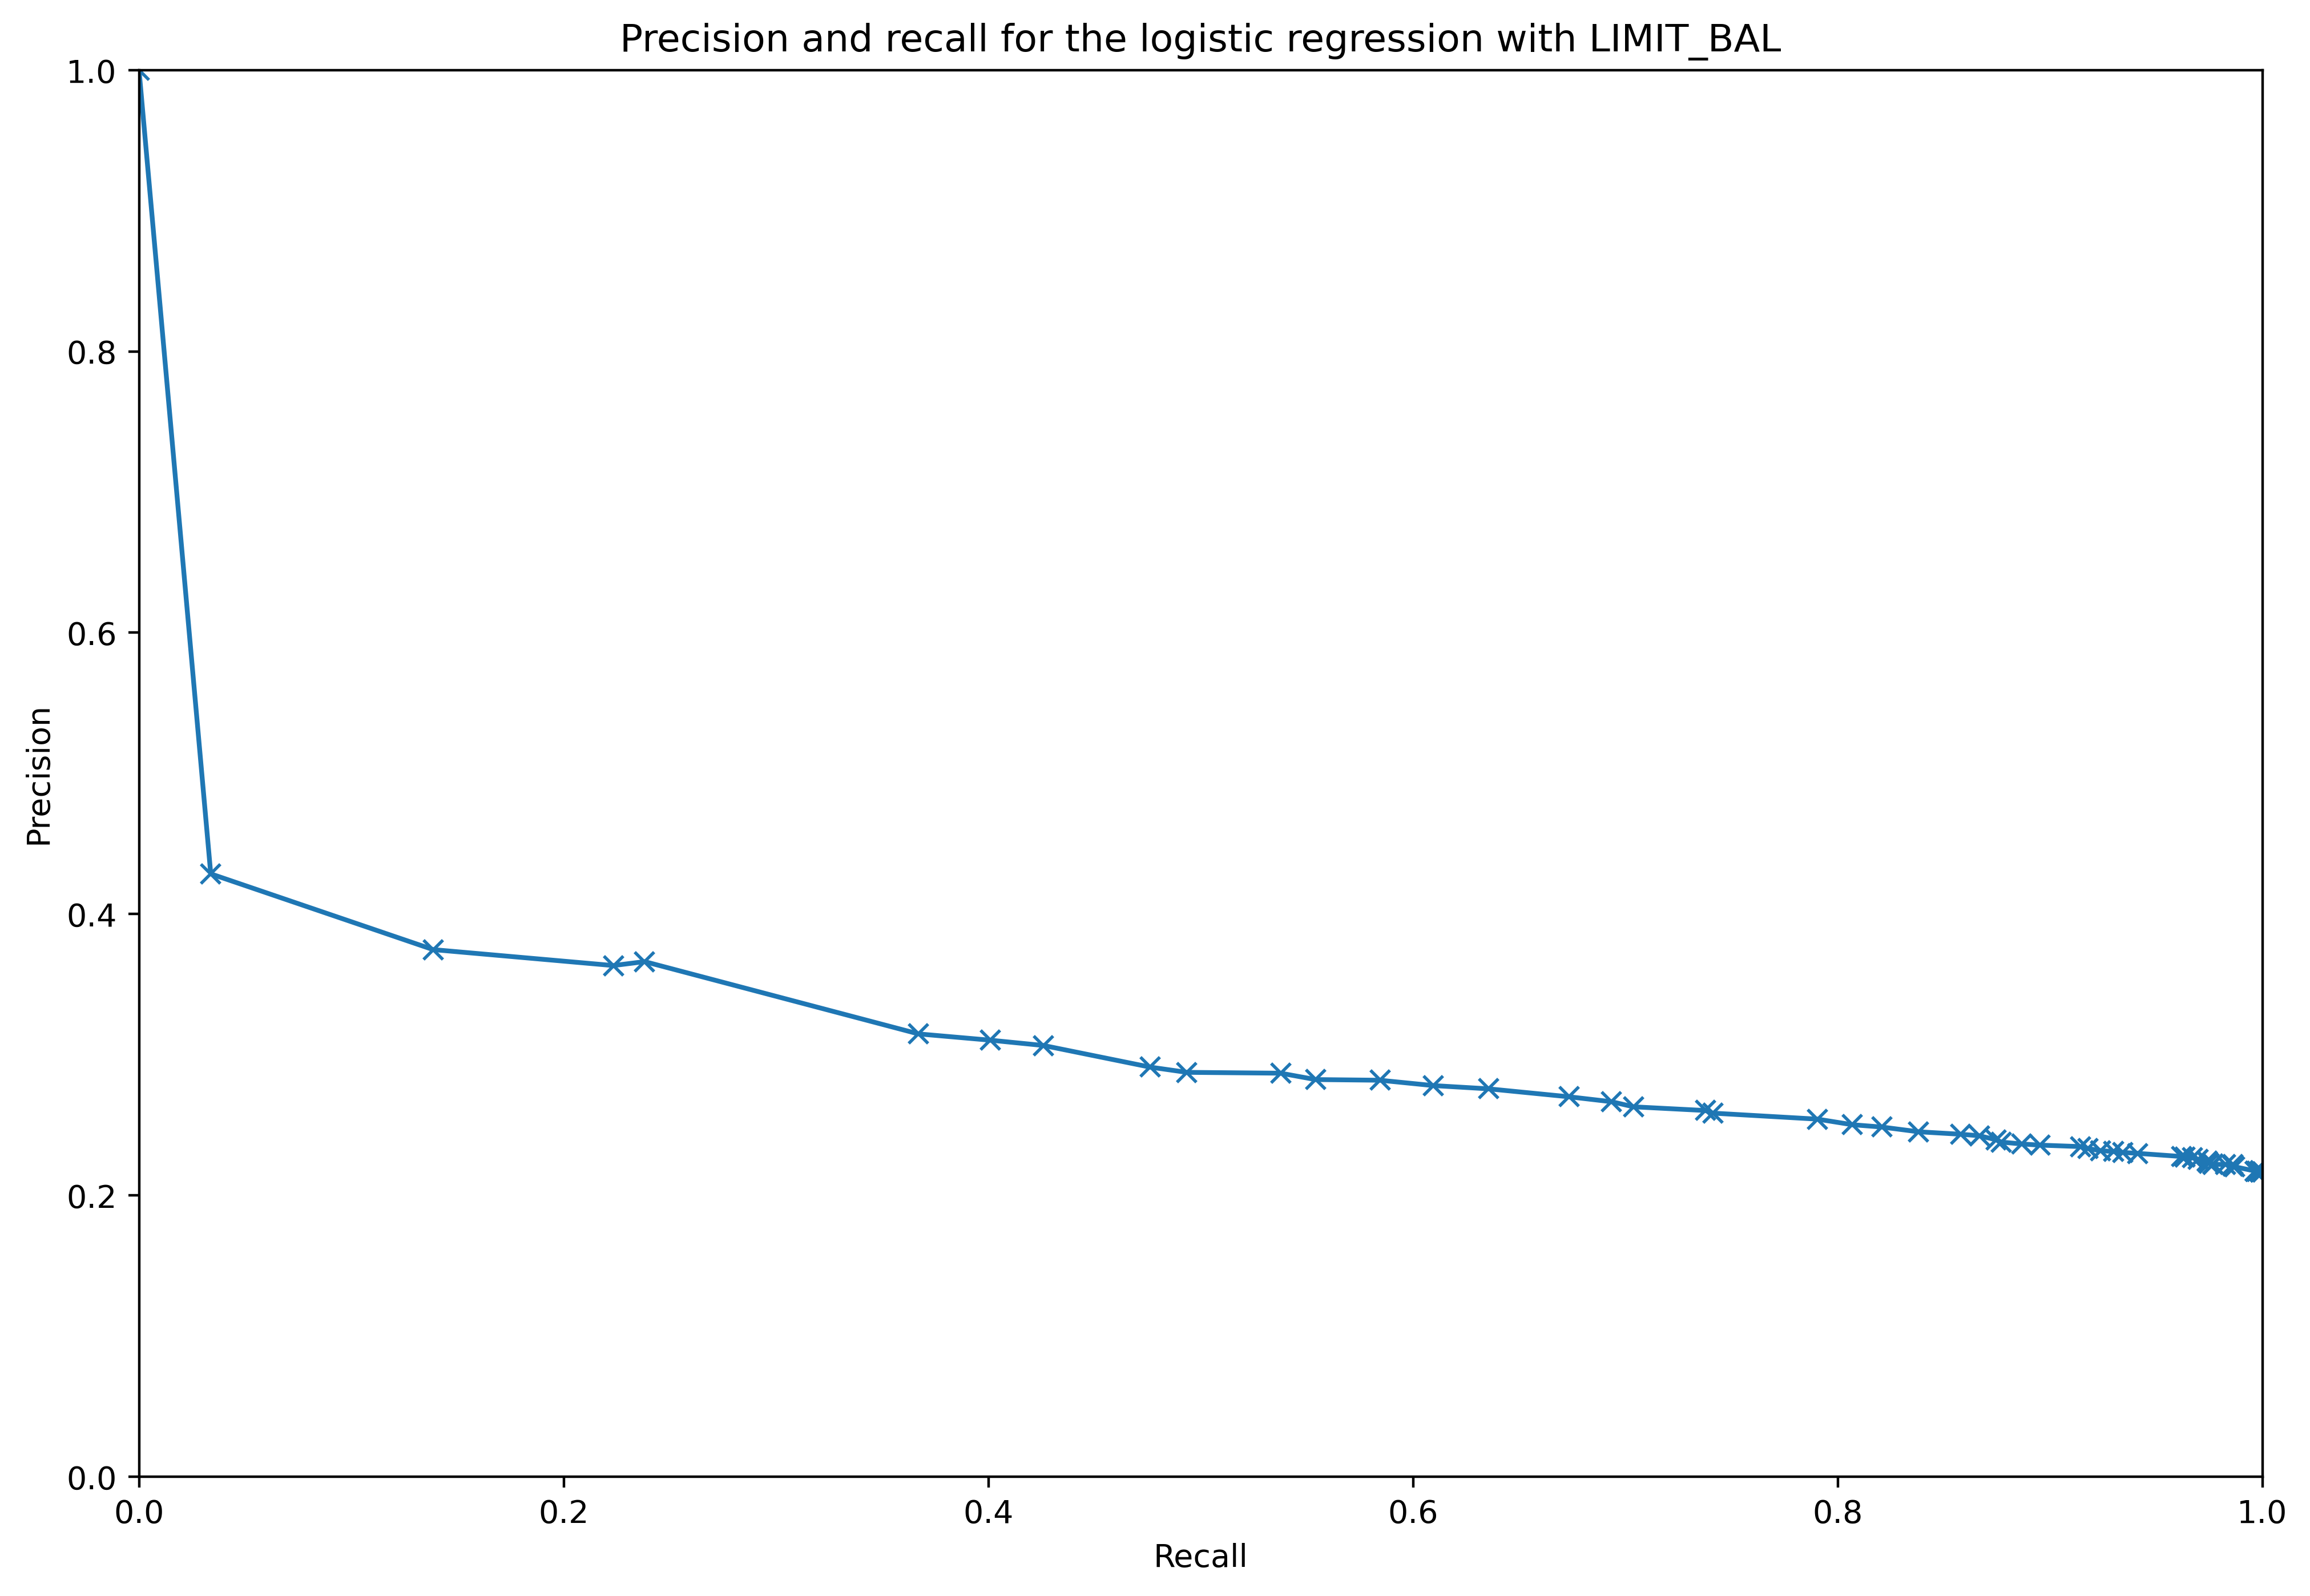

In [270]:
plt.figure(figsize=(12,8))
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [271]:
# Area under the curve (AUC) of the Precision-Recall curve 
metrics.auc(recall, precision)              # recall is x-axis, precision is y-axis of precision-recall curve

0.31566964427378624

In [272]:
# Area under the curve (AUC) of the Receiver operating characteristic  curve
metrics.auc(fpr_2, tpr_2)                   # fpr is x-axis, tpr is y-axis  of roc curve      

0.6201990844642832

In [273]:
# How did classifier perform on training data
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [274]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344